## Resources 
- https://paperswithcode.com/sota/image-clustering-on-mnist-full

In [136]:
import torch
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt

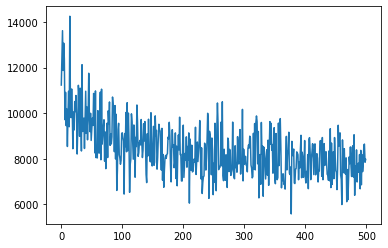

In [146]:
model_2 = torch.load('saved_models/equamnet/mnist_alpha_mlp_1.pth')

assignments = model['assignments']
labels = model['labels']

# print('normalized mutual info score', normalized_mutual_info_score(labels, assignments))

loss = model['elbo_ests']
plt.plot(loss)
      
data = model['images']

In [141]:
def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [143]:
# for clust_idx in range(10):
clust_idx = 2
for i in range(len(assignments)):
    if assignments[i] == clust_idx:
        plt.figure()
        plt.imshow(vectors_to_images(data[:,i,:]).squeeze(), cmap='gray')

In [92]:
imgs = torch.load('data/images.pt')
imgs.size()

torch.Size([1, 100, 784])

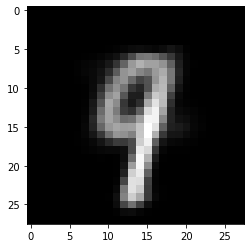

In [95]:
import matplotlib.pyplot as plt
plt.imshow(sample.view(28,28).detach().numpy(), cmap='gray')